In [2]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(4)

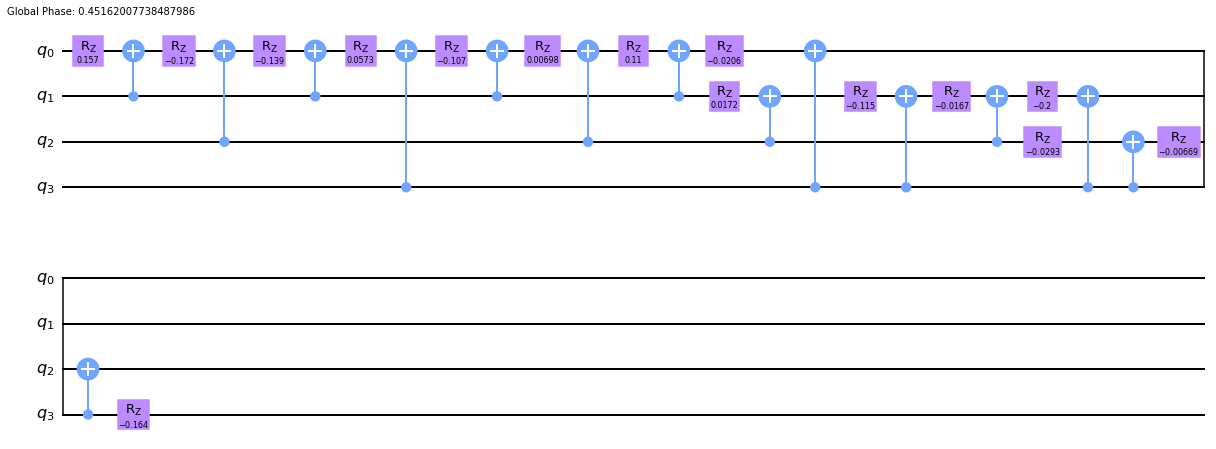

In [3]:
from qiskit.circuit.library import Diagonal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

import numpy as np
diag = np.exp(1j * np.random.rand(2**4))

circ.append(Diagonal(diag), circ.qubits)
circ.decompose(reps=4).draw("mpl")

In [4]:
import cmath
import numpy as np
import sympy

from qiskit.circuit.quantumcircuit import QuantumCircuit
from qiskit.circuit.exceptions import CircuitError

_EPS = 1e-10

def DiagTest(diag: list[complex] | np.ndarray) -> None:
    """Create a new Diagonal circuit.

    Args:
        diag: list of the 2^k diagonal entries (for a diagonal gate on k qubits).

    Raises:
        CircuitError: if the list of the diagonal entries or the qubit list is in bad format;
            if the number of diagonal entries is not 2^k, where k denotes the number of qubits
    """
    if not isinstance(diag, (list, np.ndarray)):
        raise CircuitError("Diagonal entries must be in a list or numpy array.")
    num_qubits = np.log2(len(diag))
    if num_qubits < 1 or not num_qubits.is_integer():
        raise CircuitError("The number of diagonal entries is not a positive power of 2.")
    if not np.allclose(np.abs(diag), 1, atol=_EPS):
        raise CircuitError("A diagonal element does not have absolute value one.")

    num_qubits = int(num_qubits)

    circuit = QuantumCircuit(num_qubits, name="Diagonal")
    qc_d = [[] for _ in range(2**num_qubits)]

    # Since the diagonal is a unitary, all its entries have absolute value
    # one and the diagonal is fully specified by the phases of its entries.
    diag_phases = [cmath.phase(z) for z in diag]
    angles_rz = sympy.fwht(diag_phases) / np.sqrt(2 ** (num_qubits - 2))
    print(angles_rz)

    for i in range(num_qubits - 1):
        qc_d[0].append(["rz", -angles_rz[2**i], i])

    cc_set = [0]
    graycode = ["0", "1"]
    for p in range(2, num_qubits + 1):
        t = 2 ** (p - 1)
        cc_set[t // 2 - 1] = p - 1
        cc_set.extend(cc_set)
        if p < num_qubits:
            qc_d[2**p].append(["cx", 0, p - 1])
            for i in range(2, t + 1):
                j = int(graycode[i - 1] + "1" + "0" * (num_qubits - p), 2)
                qc_d[2**p + 2 * i - 3].append(["rz", -angles_rz[j-1], p - 1])
                qc_d[2**p + 2 * i - 2].append(["cx", cc_set[i-1], p - 1])
            graycode = [x + "0" for x in graycode] + [x + "1" for x in graycode[::-1]]

    for i in range(2 ** (num_qubits - 1)):
        j = int(graycode[i] + "1", 2)
        qc_d[2 * i - 2].append(["rz", -angles_rz[j], num_qubits - 1])
        qc_d[2 * i - 1].append(["cx", cc_set[i], num_qubits - 1])

DiagTest(diag)

[3.61296061907904 -0.629182658773239 -0.0686595579149731 0.687998910122535
 0.117341443375652 -0.229339948835870 0.459781772660509 0.554214350475906
 0.657831735448515 0.0824554775591416 0.799376406405440 -0.438846927456124
 0.0267549318759647 0.428537643650427 0.0666324900563838
 -0.0279394820068062]


[[['rz', 0.13120623160956696, 0], ['rz', -1.599969245671287, 1], ['rz', 1.1611291854795862, 2], ['rz', -0.7116207676665236, 3]], [['cx', 1, 3]], [['rz', 0.32391614355813436, 3]], [['cx', 0, 3]], [['cx', 0, 1], ['rz', 0.06804555249088881, 3]], [['rz', 0.38457941645635096, 1], ['cx', 2, 3]], [['cx', 0, 1], ['rz', 0.07417485256611439, 3]], [['cx', 0, 3]], [['cx', 0, 2], ['rz', -0.6566405972151281, 3]], [['rz', -0.7116207676665236, 2], ['cx', 1, 3]], [['cx', 1, 2], ['rz', 0.38457941645635096, 3]], [['rz', 0.32391614355813436, 2], ['cx', 0, 3]], [['cx', 0, 2], ['rz', 0.1476459691351605, 3]], [['rz', 0.06804555249088881, 2], ['cx', 2, 3]], [['cx', 1, 2], ['rz', 0.13120623160956696, 3]], [['cx', 0, 3]]]


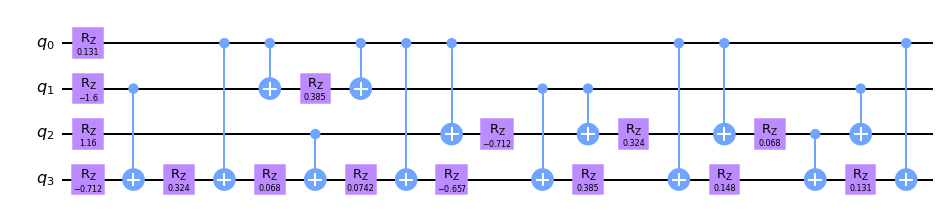

In [3]:
from qiskit import QuantumCircuit

from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew


circ = QuantumCircuit(4)
import numpy as np
diag = np.exp(1j * np.random.rand(2**4))

circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")